# Global Power Plant Regression Problem

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from xgboost import XGBRegressor

Importing required modules

In [3]:
gb=pd.read_csv('global.csv')

Importing Dataset 

As we want to predict the cappacity mw we are buliding regression problem

In [4]:
gb.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


Sample data of dataset

In [5]:
gb.shape

(908, 25)

Dataset have 908 rows and 25 columns

In [6]:
gb.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

Name of the columns

In [7]:
gb.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Datatype of our dataset, dataset have categorical and float datatypes

In [8]:
gb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

We can observe the null values present and datatypes and show the memory usage of dataset

In [9]:
gb.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

We can observe the missing values present in some columns

# Treating Missing Values

Firstly we can drop columns which have more missing value

In [10]:
gb.drop(['other_fuel1','other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh'],axis=1,inplace=True)

Dropped columns which have high missing values and it will not afect for our prediction

Mean --> Average value

Mode --> Most repeating value

In [11]:
#mean
gb['latitude']=gb['latitude'].fillna(gb['latitude'].mean())

gb['longitude']=gb['longitude'].fillna(gb['longitude'].mean())

gb['commissioning_year']=gb['commissioning_year'].fillna(gb['commissioning_year'].mean())

gb['year_of_capacity_data']=gb['year_of_capacity_data'].fillna(gb['year_of_capacity_data'].mean())

gb['generation_gwh_2013']=gb['generation_gwh_2013'].fillna(gb['generation_gwh_2013'].mean())

gb['generation_gwh_2014']=gb['generation_gwh_2014'].fillna(gb['generation_gwh_2014'].mean())

gb['generation_gwh_2015']=gb['generation_gwh_2015'].fillna(gb['generation_gwh_2015'].mean())

gb['generation_gwh_2016']=gb['generation_gwh_2016'].fillna(gb['generation_gwh_2016'].mean())

gb['generation_gwh_2017']=gb['generation_gwh_2017'].fillna(gb['generation_gwh_2017'].mean())

Treated missing values with mean

In [12]:
#mode
gb['geolocation_source']=gb['geolocation_source'].fillna(gb['geolocation_source'].mode()[0])

gb['owner']=gb['owner'].fillna(gb['owner'].mode()[0])

gb['generation_data_source']=gb['generation_data_source'].fillna(gb['generation_data_source'].mode()[0])

Treated missing value with mode

In [13]:
gb.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

We have treated missing values,no missing values present

In [14]:
gb.shape

(908, 20)

Now we have 20 columns

In [15]:
gb.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.0,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.447848,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.088110,4.781201,12.994825,0.0,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,1996.876894,2018.0,1332.538825,1175.264825,874.205000,826.629750,852.438887
50%,60.000000,21.278850,76.978950,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,388.125000,25.183775,79.211600,2003.000000,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


Statistical summary of dataset, minimum capacity is zero and maximum capacity is 4760 mw

In [16]:
gb.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_data_source     object
dtype: object

In [17]:
categorical=[['country','country_long','name','gppd_idnr','primary_fuel','owner','source',
             'url','geolocation_source','generation_data_source']].copy()

Stored categorical data

# Visualization

# Univariate Analysis

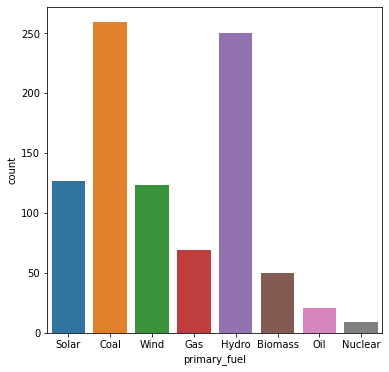

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [18]:
plt.figure(figsize=(6,6))
sns.countplot('primary_fuel',data=gb)
plt.show()
gb['primary_fuel'].value_counts()

Coal and hydro fuel are used most

In [19]:
print(gb['owner'].value_counts())

Acc Acc ltd                             570
Jk Cement ltd                             4
Sterling Agro Industries ltd.             4
Government of India                       3
SWPPL                                     3
                                       ... 
Omega Solar Projects Private Limited      1
ACME Solar Energy                         1
Cargo Solar Power                         1
HZL                                       1
Mukesh Gupta group                        1
Name: owner, Length: 280, dtype: int64


Majority sharehold of power plant where in acc as we reated missing value with mode

In [20]:
gb['source'].value_counts()

Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Lingandwi                                      1
Kesoram Industries ltd                         1
Sunflag Co ltd                                 1
Aftaab Solar Private Limited (ASPL)            1
Unity Power Limite r World                     1
Name: source, Length: 191, dtype: int64

Most of the report is of central electricity authority

In [21]:
gb['url']

0      http://www.nrel.gov/csp/solarpaces/project_det...
1                        http://www.ultratechcement.com/
2      https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...
3                                 http://www.cea.nic.in/
4                                 http://www.cea.nic.in/
                             ...                        
903                               http://www.cea.nic.in/
904                            http://karnatakapower.com
905    https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...
906                             http://www.hzlindia.com/
907    https://cdm.unfccc.int/Projects/DB/RWTUV134503...
Name: url, Length: 908, dtype: object

Url correspond to source

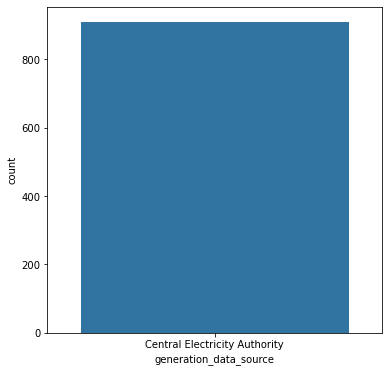

Central Electricity Authority    908
Name: generation_data_source, dtype: int64

In [22]:
plt.figure(figsize=(6,6))
sns.countplot('generation_data_source',data=gb)
plt.show()
gb['generation_data_source'].value_counts()

Generation data source

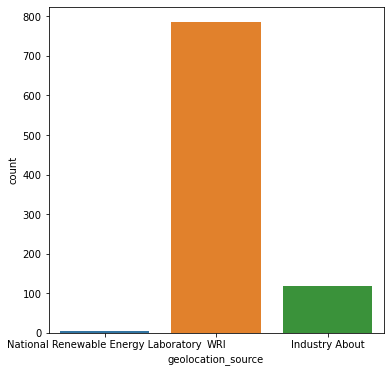

WRI                                     785
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [23]:
plt.figure(figsize=(6,6))
sns.countplot('geolocation_source',data=gb)
plt.show()
gb['geolocation_source'].value_counts()

Most of the geolocation source where from WRI

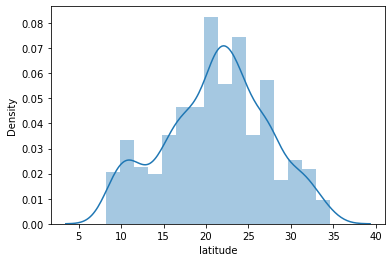

In [24]:
sns.distplot(gb['latitude'])
plt.show()

Latitude is not normally distributed

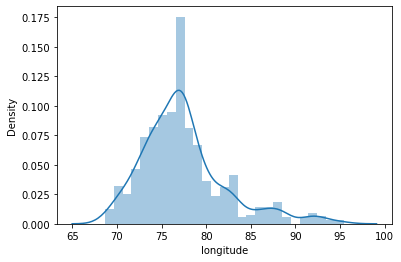

In [25]:
sns.distplot(gb['longitude'])
plt.show()

Not normally distributed

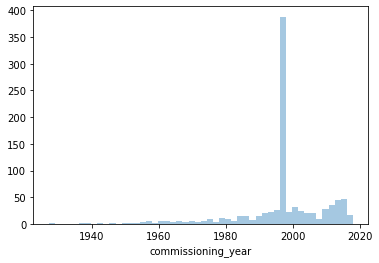

In [26]:
sns.distplot(gb['commissioning_year'].dropna(),kde=False)
plt.show()

Treated missing value with mean after that most of the value lies in mean year

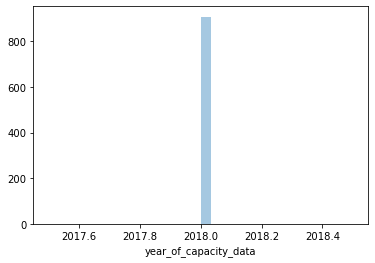

In [27]:
sns.distplot(gb['year_of_capacity_data'],kde=False)
plt.show()

Capacity information was reported in 2018

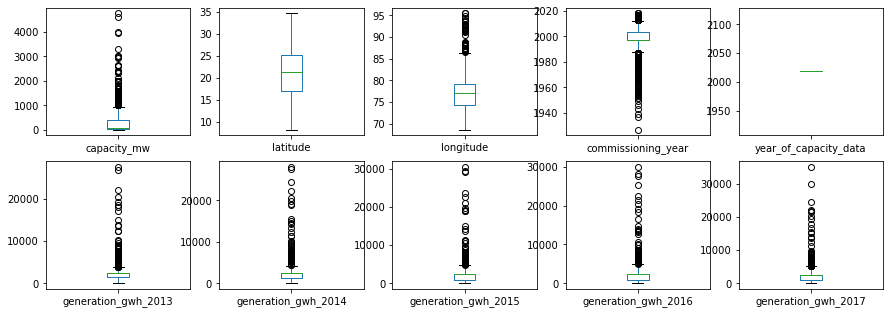

In [28]:
gb.plot(kind='box',layout=(3,5),figsize=(15,8),subplots=True)
plt.show()

Outliers detection outliers present in some columns

# Bivariate Analysis

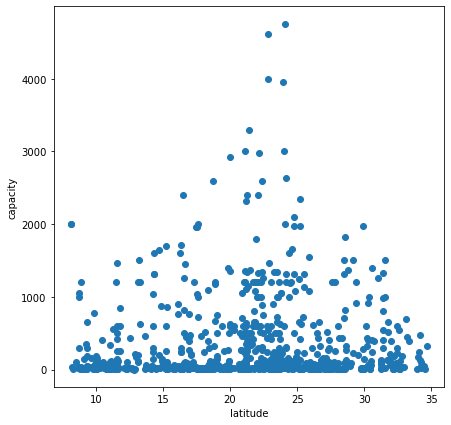

In [29]:
plt.figure(figsize=(7,7))
plt.scatter(x='latitude',y='capacity_mw',data=gb)
plt.xlabel("latitude")
plt.ylabel("capacity")
plt.show()

The capacity is maximum when latitude value is aproaximately 25

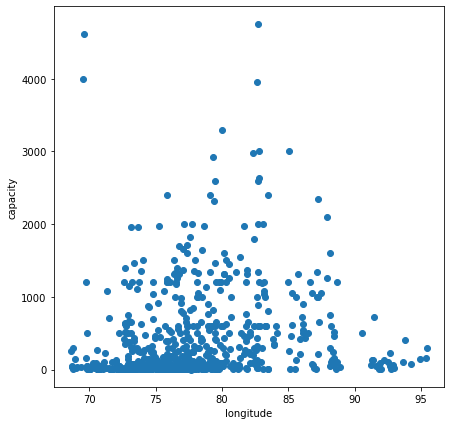

In [30]:
plt.figure(figsize=(7,7))
plt.scatter(x='longitude',y='capacity_mw',data=gb)
plt.xlabel("longitude")
plt.ylabel("capacity")
plt.show()

capacity is maximum when longitude is between 80-85

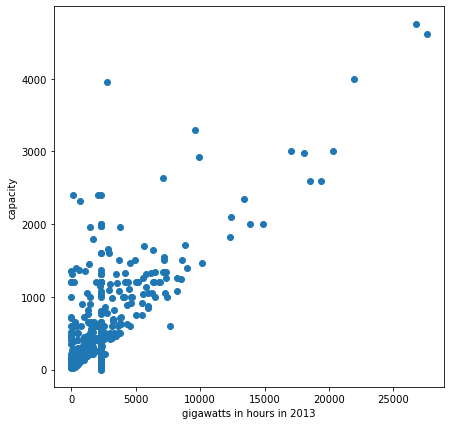

In [31]:
plt.figure(figsize=(7,7))
plt.scatter(x='generation_gwh_2013',y='capacity_mw',data=gb)
plt.xlabel("gigawatts in hours in 2013")
plt.ylabel("capacity")
plt.show()

One gigawatt is equal to 1000 mega watt,here most of the relation presents in 0-1000 megawatt in year 2013

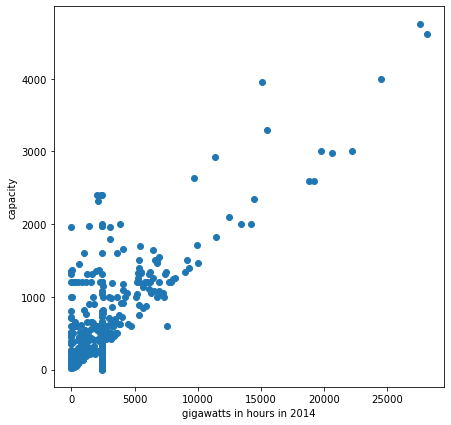

In [32]:
plt.figure(figsize=(7,7))
plt.scatter(x='generation_gwh_2014',y='capacity_mw',data=gb)
plt.xlabel("gigawatts in hours in 2014")
plt.ylabel("capacity")
plt.show()

Relation between capacity megawatt and gw in year 2014

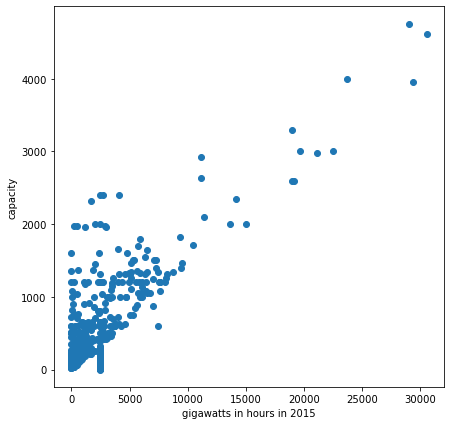

In [33]:
plt.figure(figsize=(7,7))
plt.scatter(x='generation_gwh_2015',y='capacity_mw',data=gb)
plt.xlabel("gigawatts in hours in 2015")
plt.ylabel("capacity")
plt.show()

Relation between capacity megawatt and gw in year 2015

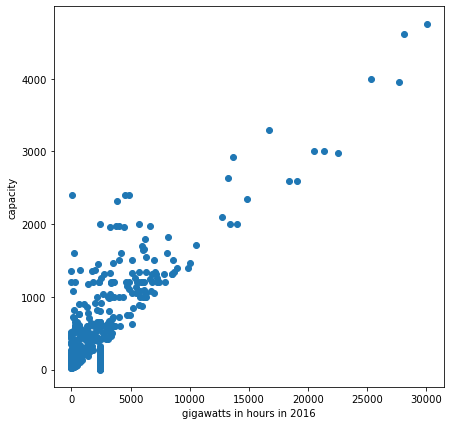

In [34]:
plt.figure(figsize=(7,7))
plt.scatter(x='generation_gwh_2016',y='capacity_mw',data=gb)
plt.xlabel("gigawatts in hours in 2016")
plt.ylabel("capacity")
plt.show()

Relation between capacity megawatt and gw in year 2016

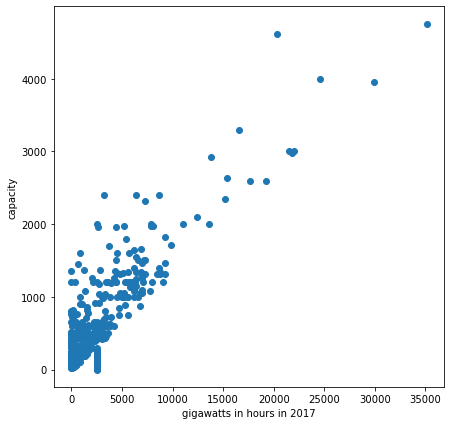

In [35]:
plt.figure(figsize=(7,7))
plt.scatter(x='generation_gwh_2017',y='capacity_mw',data=gb)
plt.xlabel("gigawatts in hours in 2017")
plt.ylabel("capacity")
plt.show()

Relation between capacity megawatt and gw in year 2017

# Correlation

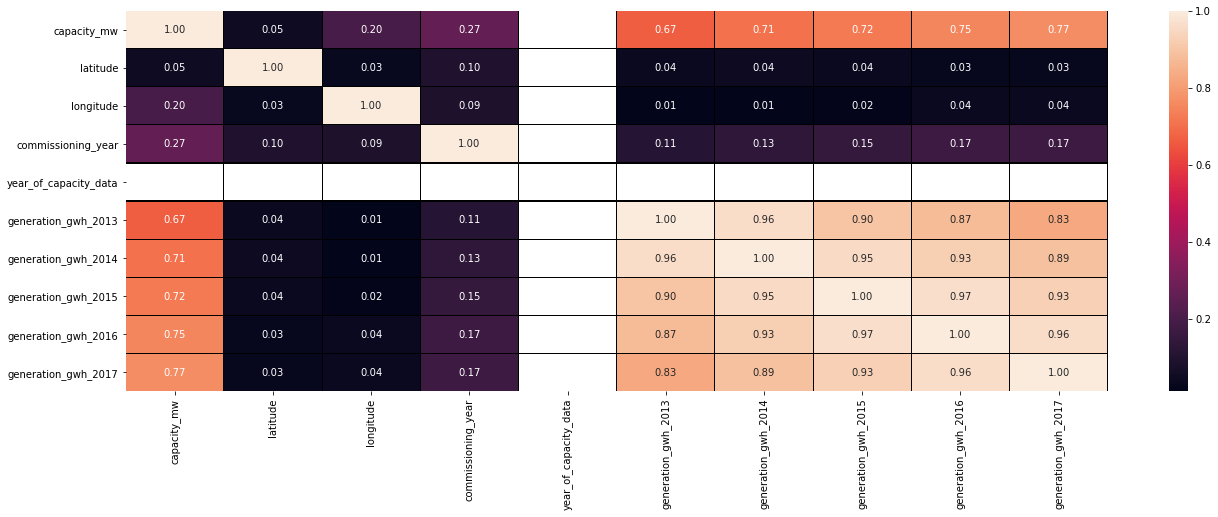

In [36]:
plt.figure(figsize=(22,7))
sns.heatmap(gb.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")
plt.show()

Here year of capacity data, we can drop that  beacuse it contains one value will not affect target variable.And also geneartion of electricity in each year is correlated to capacity mw.

In [37]:
gb.drop(['year_of_capacity_data'],axis=1,inplace=True)

Dropped column year of capacity

# Data Preprocessing

In [38]:
categorical

[['country',
  'country_long',
  'name',
  'gppd_idnr',
  'primary_fuel',
  'owner',
  'source',
  'url',
  'geolocation_source',
  'generation_data_source']]

Country and country long are same data we can drop one of them

In [39]:
gb.drop(['country_long'],axis=1,inplace=True)

Dropped column

# Encoding

In [40]:
le=LabelEncoder()
gb['country']=le.fit_transform(gb['country'])

gb['name']=le.fit_transform(gb['name'])

gb['primary_fuel']=le.fit_transform(gb['primary_fuel'])

gb['owner']=le.fit_transform(gb['owner'])

gb['source']=le.fit_transform(gb['source'])

gb['url']=le.fit_transform(gb['url'])

gb['geolocation_source']=le.fit_transform(gb['geolocation_source'])

gb['generation_data_source']=le.fit_transform(gb['generation_data_source'])

Encoded data using label encoding

In [41]:
for i in gb.columns:
    if gb[i].dtypes=="object":
        gb[i]=OrdinalEncoder().fit_transform(gb[i].values.reshape(-1,1))

Encoded ordinal data using ordinal encoder

In [42]:
gb.head()

,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0,0,658.0,2.5,28.1839,73.2407,6,2011.000000,229,109,128,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
1,0,1,520.0,98.0,24.7663,74.6090,1,1996.876894,258,174,173,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
2,0,2,854.0,39.2,21.9038,69.3732,7,1996.876894,2,21,205,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
3,0,3,0.0,135.0,23.8712,91.3602,2,2004.000000,5,22,58,2,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,0,4,1.0,1800.0,21.9603,82.4091,1,2015.000000,5,22,58,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0


Dataset after encoding

# Outliers Removal

In [43]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(gb))
gb_new=gb[(z<3).all(axis=1)]

Outlers removed zscore

In [44]:
gb.shape

(908, 18)

Shape of dataset before removing dataset

In [45]:
gb_new.shape

(0, 18)

After removing outliers,here all data are removed after removing outliers.

Checking correation after encoding

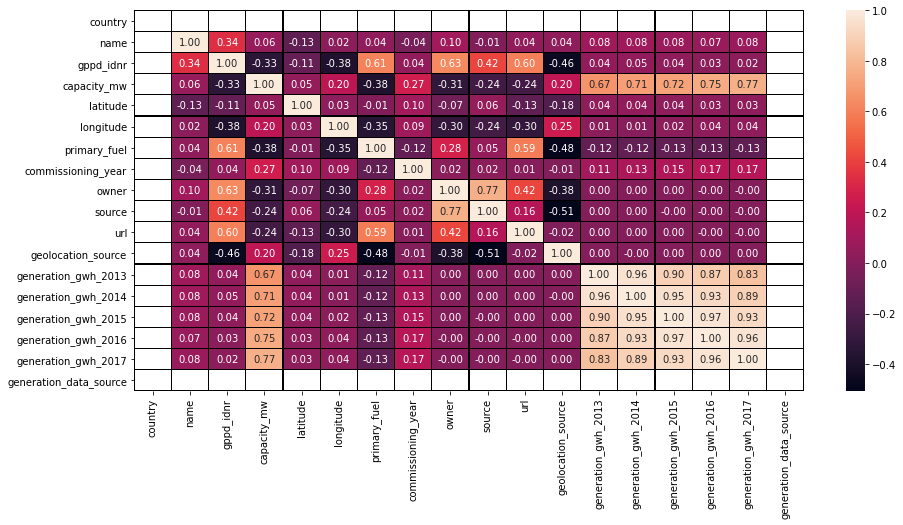

In [46]:
plt.figure(figsize=(15,7))
sns.heatmap(gb.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")
plt.show()

Here let's drop country and geneartion data source

In [47]:
gb.drop(['country','generation_data_source'],axis=1,inplace=True)

Dropped columns

In [48]:
gb.shape

(908, 16)

Shape of dataset

# Seperating target and features

In [49]:
x=gb.drop("capacity_mw",axis=1)
y=gb["capacity_mw"]

Seperated

# Skewness

In [50]:
x.skew()

name                   0.000000
gppd_idnr              0.000000
latitude              -0.147391
longitude              1.129836
primary_fuel           0.471141
commissioning_year    -1.383330
owner                  1.366078
source                 1.829145
url                    1.512258
geolocation_source    -2.161710
generation_gwh_2013    5.241491
generation_gwh_2014    5.041961
generation_gwh_2015    5.367370
generation_gwh_2016    5.071758
generation_gwh_2017    5.111938
dtype: float64

Skewness present

# Removal of skewness

In [51]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method="yeo-johnson")

Skewness removed

# Scaling

In [52]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)

Scaled Features

# Model Building

In [53]:
#linear regression
lr=LinearRegression()
l=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training r2_score is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing r2_score is:- {r2_score(y_test,pred_test)}")
    print("\n")
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        l.append(i)

At random state 0,the training r2_score is:- 0.6204331794412064
At random state 0,the testing r2_score is:- 0.6186698782691565


At random state 0 model performs well
At random state 1,the training r2_score is:- 0.6181128566752869
At random state 1,the testing r2_score is:- 0.627569070202491


At random state 2,the training r2_score is:- 0.6293006162563145
At random state 2,the testing r2_score is:- 0.5715526552352909


At random state 3,the training r2_score is:- 0.6364556566919477
At random state 3,the testing r2_score is:- 0.5299729037318066


At random state 4,the training r2_score is:- 0.6411815930790499
At random state 4,the testing r2_score is:- 0.5210178892279915


At random state 5,the training r2_score is:- 0.5888809980916637
At random state 5,the testing r2_score is:- 0.690794872614838


At random state 6,the training r2_score is:- 0.6307672756262118
At random state 6,the testing r2_score is:- 0.5472193002333563


At random state 7,the training r2_score is:- 0.62602747194861

At random state 63,the testing r2_score is:- 0.49549688660454294


At random state 64,the training r2_score is:- 0.6022054045915775
At random state 64,the testing r2_score is:- 0.6448346927493521


At random state 65,the training r2_score is:- 0.6367883310865496
At random state 65,the testing r2_score is:- 0.5473490357529618


At random state 66,the training r2_score is:- 0.6196906652683392
At random state 66,the testing r2_score is:- 0.6175773038761199


At random state 66 model performs well
At random state 67,the training r2_score is:- 0.621227889337708
At random state 67,the testing r2_score is:- 0.6108668907918058


At random state 68,the training r2_score is:- 0.6315690516022263
At random state 68,the testing r2_score is:- 0.5458113249673455


At random state 69,the training r2_score is:- 0.6162136073915413
At random state 69,the testing r2_score is:- 0.6232570723980542


At random state 69 model performs well
At random state 70,the training r2_score is:- 0.6265817979626948
At ra

At random state 142,the training r2_score is:- 0.6278816867999334
At random state 142,the testing r2_score is:- 0.5807442722361581


At random state 143,the training r2_score is:- 0.6149996481931236
At random state 143,the testing r2_score is:- 0.6466924404238608


At random state 144,the training r2_score is:- 0.5984941791415463
At random state 144,the testing r2_score is:- 0.6476142712328141


At random state 145,the training r2_score is:- 0.6266397350101574
At random state 145,the testing r2_score is:- 0.5926792476066924


At random state 146,the training r2_score is:- 0.6222742617248289
At random state 146,the testing r2_score is:- 0.6000086045151427


At random state 147,the training r2_score is:- 0.6161652814298004
At random state 147,the testing r2_score is:- 0.6268820465981979


At random state 148,the training r2_score is:- 0.6228965634134946
At random state 148,the testing r2_score is:- 0.594991072391251


At random state 149,the training r2_score is:- 0.6378564550835437
At r

Splitted into trained and test model finding the best random states

In [54]:
l

[0, 28, 66, 69, 73, 111, 116, 134, 166, 179, 189]

List of best random states

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=189)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("r2 score",r2_score(y_test,predlr)*100)
print("Mean Absolute error",mean_absolute_error(y_test,predlr))
print("RMSE",np.sqrt(mean_squared_error(y_test,predlr)))

r2 score 61.79286041987473
Mean Absolute error 261.1262157517275
RMSE 341.0264768682863


Apply the best random state and fitted the model and r2 score of linear regerssion is 62%

In [56]:
#dt regression
dt=DecisionTreeRegressor()
d=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print(f"At random state {i},the training r2_score is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing r2_score is:- {r2_score(y_test,pred_test)}")
    print("\n")
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        d.append(i)

At random state 0,the training r2_score is:- 1.0
At random state 0,the testing r2_score is:- 0.8562812970186595


At random state 1,the training r2_score is:- 1.0
At random state 1,the testing r2_score is:- 0.8406442301096183


At random state 2,the training r2_score is:- 1.0
At random state 2,the testing r2_score is:- 0.7645939997010447


At random state 3,the training r2_score is:- 1.0
At random state 3,the testing r2_score is:- 0.7038215913356441


At random state 4,the training r2_score is:- 1.0
At random state 4,the testing r2_score is:- 0.8085256849792001


At random state 5,the training r2_score is:- 1.0
At random state 5,the testing r2_score is:- 0.8415505006336349


At random state 6,the training r2_score is:- 1.0
At random state 6,the testing r2_score is:- 0.7463375203064277


At random state 7,the training r2_score is:- 1.0
At random state 7,the testing r2_score is:- 0.7582662307802736


At random state 8,the training r2_score is:- 1.0
At random state 8,the testing r2_score 

At random state 76,the testing r2_score is:- 0.692538535169375


At random state 77,the training r2_score is:- 1.0
At random state 77,the testing r2_score is:- 0.6565283355221276


At random state 78,the training r2_score is:- 1.0
At random state 78,the testing r2_score is:- 0.48893525270767224


At random state 79,the training r2_score is:- 1.0
At random state 79,the testing r2_score is:- 0.7325973143617319


At random state 80,the training r2_score is:- 1.0
At random state 80,the testing r2_score is:- 0.8315185943879407


At random state 81,the training r2_score is:- 1.0
At random state 81,the testing r2_score is:- 0.7837262555881922


At random state 82,the training r2_score is:- 1.0
At random state 82,the testing r2_score is:- 0.7438109409229634


At random state 83,the training r2_score is:- 1.0
At random state 83,the testing r2_score is:- 0.8173211450604914


At random state 84,the training r2_score is:- 1.0
At random state 84,the testing r2_score is:- 0.6261604372236749


At ran

At random state 153,the training r2_score is:- 1.0
At random state 153,the testing r2_score is:- 0.4015981290558768


At random state 154,the training r2_score is:- 1.0
At random state 154,the testing r2_score is:- 0.7354532386778316


At random state 155,the training r2_score is:- 1.0
At random state 155,the testing r2_score is:- 0.5649739966939729


At random state 156,the training r2_score is:- 1.0
At random state 156,the testing r2_score is:- 0.7261153850715343


At random state 157,the training r2_score is:- 1.0
At random state 157,the testing r2_score is:- 0.6538581631785192


At random state 158,the training r2_score is:- 1.0
At random state 158,the testing r2_score is:- 0.7611759611982889


At random state 159,the training r2_score is:- 1.0
At random state 159,the testing r2_score is:- 0.7616593930280511


At random state 160,the training r2_score is:- 1.0
At random state 160,the testing r2_score is:- 0.854648244675371


At random state 161,the training r2_score is:- 1.0
At ran

Splitted into trained and test data and finding best random state

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=132)
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("r2 score",r2_score(y_test,preddt)*100)
print("Mean Absolute error",mean_absolute_error(y_test,preddt))
print("RMSE",np.sqrt(mean_squared_error(y_test,preddt)))

r2 score 86.13581629880798
Mean Absolute error 127.04706593406593
RMSE 257.63858286831885


Apply the best random state and find r2 score of decision tree regressor is 86%

In [58]:
#rf regression
rf=RandomForestRegressor()
r=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    print(f"At random state {i},the training r2_score is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing r2_score is:- {r2_score(y_test,pred_test)}")
    print("\n")
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        r.append(i)

At random state 0,the training r2_score is:- 0.9799265399076489
At random state 0,the testing r2_score is:- 0.875098008016851


At random state 1,the training r2_score is:- 0.9790351358032708
At random state 1,the testing r2_score is:- 0.9115038415248427


At random state 2,the training r2_score is:- 0.9791505987279261
At random state 2,the testing r2_score is:- 0.8972082737662089


At random state 3,the training r2_score is:- 0.983978814062322
At random state 3,the testing r2_score is:- 0.7467872524352315


At random state 4,the training r2_score is:- 0.9809480675411171
At random state 4,the testing r2_score is:- 0.8301913898962977


At random state 5,the training r2_score is:- 0.9762771429819445
At random state 5,the testing r2_score is:- 0.8992390065194503


At random state 6,the training r2_score is:- 0.9818656383527122
At random state 6,the testing r2_score is:- 0.8485734263522199


At random state 7,the training r2_score is:- 0.9793333419964746
At random state 7,the testing r2_sc

At random state 63,the training r2_score is:- 0.981206843292385
At random state 63,the testing r2_score is:- 0.8209390452278011


At random state 64,the training r2_score is:- 0.9776638724511083
At random state 64,the testing r2_score is:- 0.8944653095160079


At random state 65,the training r2_score is:- 0.9802744317952464
At random state 65,the testing r2_score is:- 0.808106601365709


At random state 66,the training r2_score is:- 0.9829764146691925
At random state 66,the testing r2_score is:- 0.8290105396989553


At random state 67,the training r2_score is:- 0.9778662658515737
At random state 67,the testing r2_score is:- 0.8729916604780371


At random state 68,the training r2_score is:- 0.9830684357054893
At random state 68,the testing r2_score is:- 0.7537558252410963


At random state 69,the training r2_score is:- 0.9801035414320812
At random state 69,the testing r2_score is:- 0.8789779607469332


At random state 70,the training r2_score is:- 0.9802981982817237
At random state 70,t

At random state 126,the training r2_score is:- 0.9790499386034194
At random state 126,the testing r2_score is:- 0.8521503874186375


At random state 127,the training r2_score is:- 0.9809501481103023
At random state 127,the testing r2_score is:- 0.8467279364082949


At random state 128,the training r2_score is:- 0.9791078547640226
At random state 128,the testing r2_score is:- 0.8615401380540862


At random state 129,the training r2_score is:- 0.9799580582347941
At random state 129,the testing r2_score is:- 0.8962867820016729


At random state 130,the training r2_score is:- 0.9807020549995863
At random state 130,the testing r2_score is:- 0.8522075181032107


At random state 131,the training r2_score is:- 0.9773637863731659
At random state 131,the testing r2_score is:- 0.8805512647339598


At random state 132,the training r2_score is:- 0.9761687552279931
At random state 132,the testing r2_score is:- 0.915393277128966


At random state 133,the training r2_score is:- 0.9825519752868366
At r

At random state 188,the training r2_score is:- 0.9802393187454291
At random state 188,the testing r2_score is:- 0.8861544804988543


At random state 189,the training r2_score is:- 0.9790526208892066
At random state 189,the testing r2_score is:- 0.8924754490618223


At random state 190,the training r2_score is:- 0.9826167893561991
At random state 190,the testing r2_score is:- 0.815609149320216


At random state 191,the training r2_score is:- 0.9810300212371841
At random state 191,the testing r2_score is:- 0.8676039860739683


At random state 192,the training r2_score is:- 0.9809072996653864
At random state 192,the testing r2_score is:- 0.8486691271351352


At random state 193,the training r2_score is:- 0.9816674086902716
At random state 193,the testing r2_score is:- 0.8718574289987862


At random state 194,the training r2_score is:- 0.9780363697265325
At random state 194,the testing r2_score is:- 0.9213684909489719


At random state 195,the training r2_score is:- 0.979152778252821
At ra

Splitted into trained and test data finding best random states

In [59]:
#rf regression
rf=RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=199)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("r2 score",r2_score(y_test,predrf)*100)
print("Mean Absolute error",mean_absolute_error(y_test,predrf))
print("RMSE",np.sqrt(mean_squared_error(y_test,predrf)))

r2 score 92.0951508303045
Mean Absolute error 96.17298714285715
RMSE 192.60485148176332


Apply best random state and fitted the data and r2 score of random forest is 92%

In [60]:
#knn regressor
kn=KNeighborsRegressor()
k=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    kn.fit(x_train,y_train)
    pred_train=kn.predict(x_train)
    pred_test=kn.predict(x_test)
    print(f"At random state {i},the training r2_score is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing r2_score is:- {r2_score(y_test,pred_test)}")
    print("\n")
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        k.append(i)

At random state 0,the training r2_score is:- 0.8481489333484978
At random state 0,the testing r2_score is:- 0.7943466836741798


At random state 1,the training r2_score is:- 0.8416620423373388
At random state 1,the testing r2_score is:- 0.8327148517666695


At random state 2,the training r2_score is:- 0.8500063218480333
At random state 2,the testing r2_score is:- 0.8114391746279906


At random state 3,the training r2_score is:- 0.8788589136669206
At random state 3,the testing r2_score is:- 0.6570912015450692


At random state 4,the training r2_score is:- 0.8611343956117625
At random state 4,the testing r2_score is:- 0.7652020859860682


At random state 5,the training r2_score is:- 0.8414847710000295
At random state 5,the testing r2_score is:- 0.8534712481884204


At random state 6,the training r2_score is:- 0.8600535807088674
At random state 6,the testing r2_score is:- 0.7571145114721486


At random state 7,the training r2_score is:- 0.8657795929746424
At random state 7,the testing r2_

At random state 64,the training r2_score is:- 0.8473029598134836
At random state 64,the testing r2_score is:- 0.8284787820336899


At random state 65,the training r2_score is:- 0.8689307573373076
At random state 65,the testing r2_score is:- 0.6969892630159271


At random state 66,the training r2_score is:- 0.860831444518904
At random state 66,the testing r2_score is:- 0.7293370768547973


At random state 67,the training r2_score is:- 0.8471226808781676
At random state 67,the testing r2_score is:- 0.7764341529822079


At random state 68,the training r2_score is:- 0.8736420224566975
At random state 68,the testing r2_score is:- 0.6061166234989428


At random state 69,the training r2_score is:- 0.8585441573295334
At random state 69,the testing r2_score is:- 0.791121086612395


At random state 70,the training r2_score is:- 0.8576993955771576
At random state 70,the testing r2_score is:- 0.812041327090588


At random state 71,the training r2_score is:- 0.8508405854825942
At random state 71,th

At random state 126,the training r2_score is:- 0.8630363833484695
At random state 126,the testing r2_score is:- 0.8105005494119358


At random state 127,the training r2_score is:- 0.8532941218496924
At random state 127,the testing r2_score is:- 0.7858749017617089


At random state 128,the training r2_score is:- 0.8726152182905372
At random state 128,the testing r2_score is:- 0.7965880449789692


At random state 129,the training r2_score is:- 0.8476409054103936
At random state 129,the testing r2_score is:- 0.8316949873981465


At random state 130,the training r2_score is:- 0.8534821733477904
At random state 130,the testing r2_score is:- 0.8148617975868886


At random state 131,the training r2_score is:- 0.8397335668412078
At random state 131,the testing r2_score is:- 0.8385900024090157


At random state 131 model performs well
At random state 132,the training r2_score is:- 0.83916197324407
At random state 132,the testing r2_score is:- 0.8789769021214123


At random state 133,the trainin

At random state 189,the training r2_score is:- 0.8462252048143118
At random state 189,the testing r2_score is:- 0.8710643345760601


At random state 190,the training r2_score is:- 0.8639802657956437
At random state 190,the testing r2_score is:- 0.7503721871460761


At random state 191,the training r2_score is:- 0.8587825041751342
At random state 191,the testing r2_score is:- 0.7816124382525496


At random state 192,the training r2_score is:- 0.8573927563019484
At random state 192,the testing r2_score is:- 0.7655242419728174


At random state 193,the training r2_score is:- 0.8492012778754322
At random state 193,the testing r2_score is:- 0.8405650070799995


At random state 194,the training r2_score is:- 0.8481964377564168
At random state 194,the testing r2_score is:- 0.8556570437135701


At random state 195,the training r2_score is:- 0.8397474724817677
At random state 195,the testing r2_score is:- 0.8266960121325213


At random state 196,the training r2_score is:- 0.847115210641993
At r

Splitted into training and testing  data finding best random state 

In [61]:
k

[43, 80, 102, 125, 131, 184]

List of best random states

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=184)
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
print("r2 score",r2_score(y_test,predkn)*100)
print("Mean Absolute error",mean_absolute_error(y_test,predkn))
print("RMSE",np.sqrt(mean_squared_error(y_test,predkn)))

r2 score 84.55241498937814
Mean Absolute error 109.6337912087912
RMSE 213.33454398553576


Applied best random state,r2 score of kneighbors is 84%

In [63]:
#xgboost regressor
xgb=XGBRegressor()
xg=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    xgb.fit(x_train,y_train)
    pred_train=xgb.predict(x_train)
    pred_test=xgb.predict(x_test)
    print(f"At random state {i},the training r2_score is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing r2_score is:- {r2_score(y_test,pred_test)}")
    print("\n")
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        xg.append(i)

At random state 0,the training r2_score is:- 0.9999175253742436
At random state 0,the testing r2_score is:- 0.8645116916750983


At random state 1,the training r2_score is:- 0.9998945446841232
At random state 1,the testing r2_score is:- 0.8918594690056165


At random state 2,the training r2_score is:- 0.9999135594188279
At random state 2,the testing r2_score is:- 0.8409283204207689


At random state 3,the training r2_score is:- 0.9998984421211536
At random state 3,the testing r2_score is:- 0.7190460037347227


At random state 4,the training r2_score is:- 0.9999017083164812
At random state 4,the testing r2_score is:- 0.8246411000032218


At random state 5,the training r2_score is:- 0.9998787631747841
At random state 5,the testing r2_score is:- 0.8763285864210316


At random state 6,the training r2_score is:- 0.9998896930725529
At random state 6,the testing r2_score is:- 0.8441834336130188


At random state 7,the training r2_score is:- 0.9998987523328002
At random state 7,the testing r2_

At random state 63,the training r2_score is:- 0.9999063111553206
At random state 63,the testing r2_score is:- 0.7804665117353046


At random state 64,the training r2_score is:- 0.999892142665923
At random state 64,the testing r2_score is:- 0.8832534998330448


At random state 65,the training r2_score is:- 0.9999003418480219
At random state 65,the testing r2_score is:- 0.810258465538898


At random state 66,the training r2_score is:- 0.9999280466979703
At random state 66,the testing r2_score is:- 0.7923245210675197


At random state 67,the training r2_score is:- 0.9998758769991503
At random state 67,the testing r2_score is:- 0.8460064664963693


At random state 68,the training r2_score is:- 0.9999169190711045
At random state 68,the testing r2_score is:- 0.7404035174523285


At random state 69,the training r2_score is:- 0.9998913611624874
At random state 69,the testing r2_score is:- 0.8320276175934427


At random state 70,the training r2_score is:- 0.9998845343066612
At random state 70,t

At random state 126,the training r2_score is:- 0.999900722721449
At random state 126,the testing r2_score is:- 0.8611694952398911


At random state 127,the training r2_score is:- 0.9999135929199594
At random state 127,the testing r2_score is:- 0.8013259348873358


At random state 128,the training r2_score is:- 0.9998899537518239
At random state 128,the testing r2_score is:- 0.8476268819908958


At random state 129,the training r2_score is:- 0.9998830448138413
At random state 129,the testing r2_score is:- 0.825103488642146


At random state 130,the training r2_score is:- 0.9999342171809567
At random state 130,the testing r2_score is:- 0.8331902530600845


At random state 131,the training r2_score is:- 0.999867920301249
At random state 131,the testing r2_score is:- 0.8890246345157898


At random state 132,the training r2_score is:- 0.9998893677157475
At random state 132,the testing r2_score is:- 0.9094805357489993


At random state 133,the training r2_score is:- 0.9998975029253877
At ran

At random state 188,the training r2_score is:- 0.9999150807579593
At random state 188,the testing r2_score is:- 0.8543620373063066


At random state 189,the training r2_score is:- 0.9999231076675229
At random state 189,the testing r2_score is:- 0.8191551492286777


At random state 190,the training r2_score is:- 0.9999067546292589
At random state 190,the testing r2_score is:- 0.7920925654598002


At random state 191,the training r2_score is:- 0.9998925116851941
At random state 191,the testing r2_score is:- 0.8352609950790416


At random state 192,the training r2_score is:- 0.9998819085663697
At random state 192,the testing r2_score is:- 0.8136412961555995


At random state 193,the training r2_score is:- 0.9998978409689492
At random state 193,the testing r2_score is:- 0.8402089780698263


At random state 194,the training r2_score is:- 0.9999164331699775
At random state 194,the testing r2_score is:- 0.8592285310660583


At random state 195,the training r2_score is:- 0.999879557846287
At r

Splitted into trained and test data and finding best random states

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=199)
xgb.fit(x_train,y_train)
predxg=xgb.predict(x_test)
print("r2 score",r2_score(y_test,predxg)*100)
print("Mean Absolute error",mean_absolute_error(y_test,predxg))
print("RMSE",np.sqrt(mean_squared_error(y_test,predxg)))

r2 score 90.09107748404061
Mean Absolute error 106.64169215897414
RMSE 215.64214575086436


Applied best random state and r2 score of  xgboost is 90%

# Cross Validation Score

In [65]:
print("CV score and it's mean of KNearest Neighbors:",cross_val_score(kn,x,y,cv=8).mean(),"r2 score:",r2_score(y_test,predkn))
print("CV score and it's mean of Decision Tree Regressor:",cross_val_score(dt,x,y,cv=8).mean(),"r2 score:",r2_score(y_test,preddt))
print("CV score and it's mean of Linear Regression:",cross_val_score(lr,x,y,cv=8).mean(),"r2 score:",r2_score(y_test,predlr))
print("CV score and it's mean of Random Forest:",cross_val_score(rf,x,y,cv=8).mean(),"r2 score:",r2_score(y_test,predrf))
print("CV score and it's mean of XG Boost:",cross_val_score(xgb,x,y,cv=8).mean(),"r2 score:",r2_score(y_test,predxg))

CV score and it's mean of KNearest Neighbors: 0.7716089727707404 r2 score: -0.5628649550765104
CV score and it's mean of Decision Tree Regressor: 0.6532774431068257 r2 score: -1.0569126716673076
CV score and it's mean of Linear Regression: 0.5735023542807207 r2 score: -0.21238109563353458
CV score and it's mean of Random Forest: 0.8455274750996272 r2 score: 0.9209515083030451
CV score and it's mean of XG Boost: 0.7972306441810666 r2 score: 0.9009107748404062


Here random forest regressor's cv score and r2 score are least difference so I proceed with random forest Regressor

# Hyper Parameter Tuning

In [66]:
parameter={'n_estimators': np.arange(25,55),
           'max_depth':np.arange(2,10),
          'criterion':['squared_error','absolute_error','poisson'],'min_samples_split':np.arange(2,9)}

Stored random forest parameter in variable

In [67]:
gv=GridSearchCV(rf,parameter,cv=8)

Calling instance variable of gridsearch cv

In [68]:
gv.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8]),
                         'n_estimators': array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54])})

Fitting data

In [69]:
gv.best_params_

{'criterion': 'poisson',
 'max_depth': 9,
 'min_samples_split': 5,
 'n_estimators': 49}

Got best parameters after tuning

In [70]:
best=RandomForestRegressor(n_estimators=49,max_depth=9,criterion='poisson',min_samples_split=5)
best.fit(x_train,y_train)
predbest=best.predict(x_test)
acc_b=(r2_score(y_test,predbest))
print(acc_b*100)

64.05399766259141


Saving the model after tuning

# Saving the model

In [71]:
import joblib as jb
jb.dump(best,"Best.pkl")

['Best.pkl']